
## Unsupervised machine learning: Clustering example



### Dataset description:

- Dataframe containing four numerical and one discrete variable. Numerical columns represent the length and width of the petals and sepals from 150 flowers of three species: setosa, virginica and versicolor (given on the last field, a vector with possible 3 levels)

Files to use:

- iris.csv - file with the data in the CSV format


### Load necessary packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## to be sure we can see graphs in the notebook need to run the following line
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

### Loading dataset and metadata

In [10]:
iris = pd.read_csv("data/iris/iris.csv", sep=",", index_col=0)

### Data Exploration

In [11]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [12]:
iris.shape

(150, 5)

In [13]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Descriptive Stats 

In [14]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Missing values

In [16]:
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

The dataset does not include any missing values.

### Data Processing

Standardizing the data to have a mean of 0 and a standard deviation of 1 (z-scores); to ensure that all features contribute equally to the clustering process.

In [17]:
scaler = StandardScaler()
iris_scaled = pd.DataFrame(scaler.fit_transform(iris.iloc[:,:4], iris.iloc[:,4]))
iris_scaled.columns = iris.columns[:4]
iris_scaled.to_csv("data/iris/iris_scaled.csv", index=False) # export scaled data to CSV
iris_scaled

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Hierarchical clustering 

Creating a full dendogram based on hierarchical/agglomerative clustering using scipy. 

Notes: This performs the clustering using the "single" method for cluster distance calculation and the Euclidean distance as similarity metric.Euclidean distance is often used to measure the dissimilarity between data points. Points that are closer to each other in Euclidean space are considered more similar.

In [19]:
Z = linkage(iris_scaled, method='single', metric='euclidean')    
print(Z[:10]) #first 10 rows of the linkage matrix
    # single method: measures the minimum distance between clusters.

[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.21167870e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.21167870e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.31632184e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.31632184e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.31632184e-01 2.00000000e+00]
 [4.00000000e+01 1.54000000e+02 1.33836265e-01 3.00000000e+00]
 [1.27000000e+02 1.38000000e+02 1.33836265e-01 2.00000000e+00]
 [2.00000000e+00 4.70000000e+01 1.33836265e-01 2.00000000e+00]
 [3.00000000e+01 1.53000000e+02 1.33836265e-01 3.00000000e+00]]


Plotting the resulting dendogram

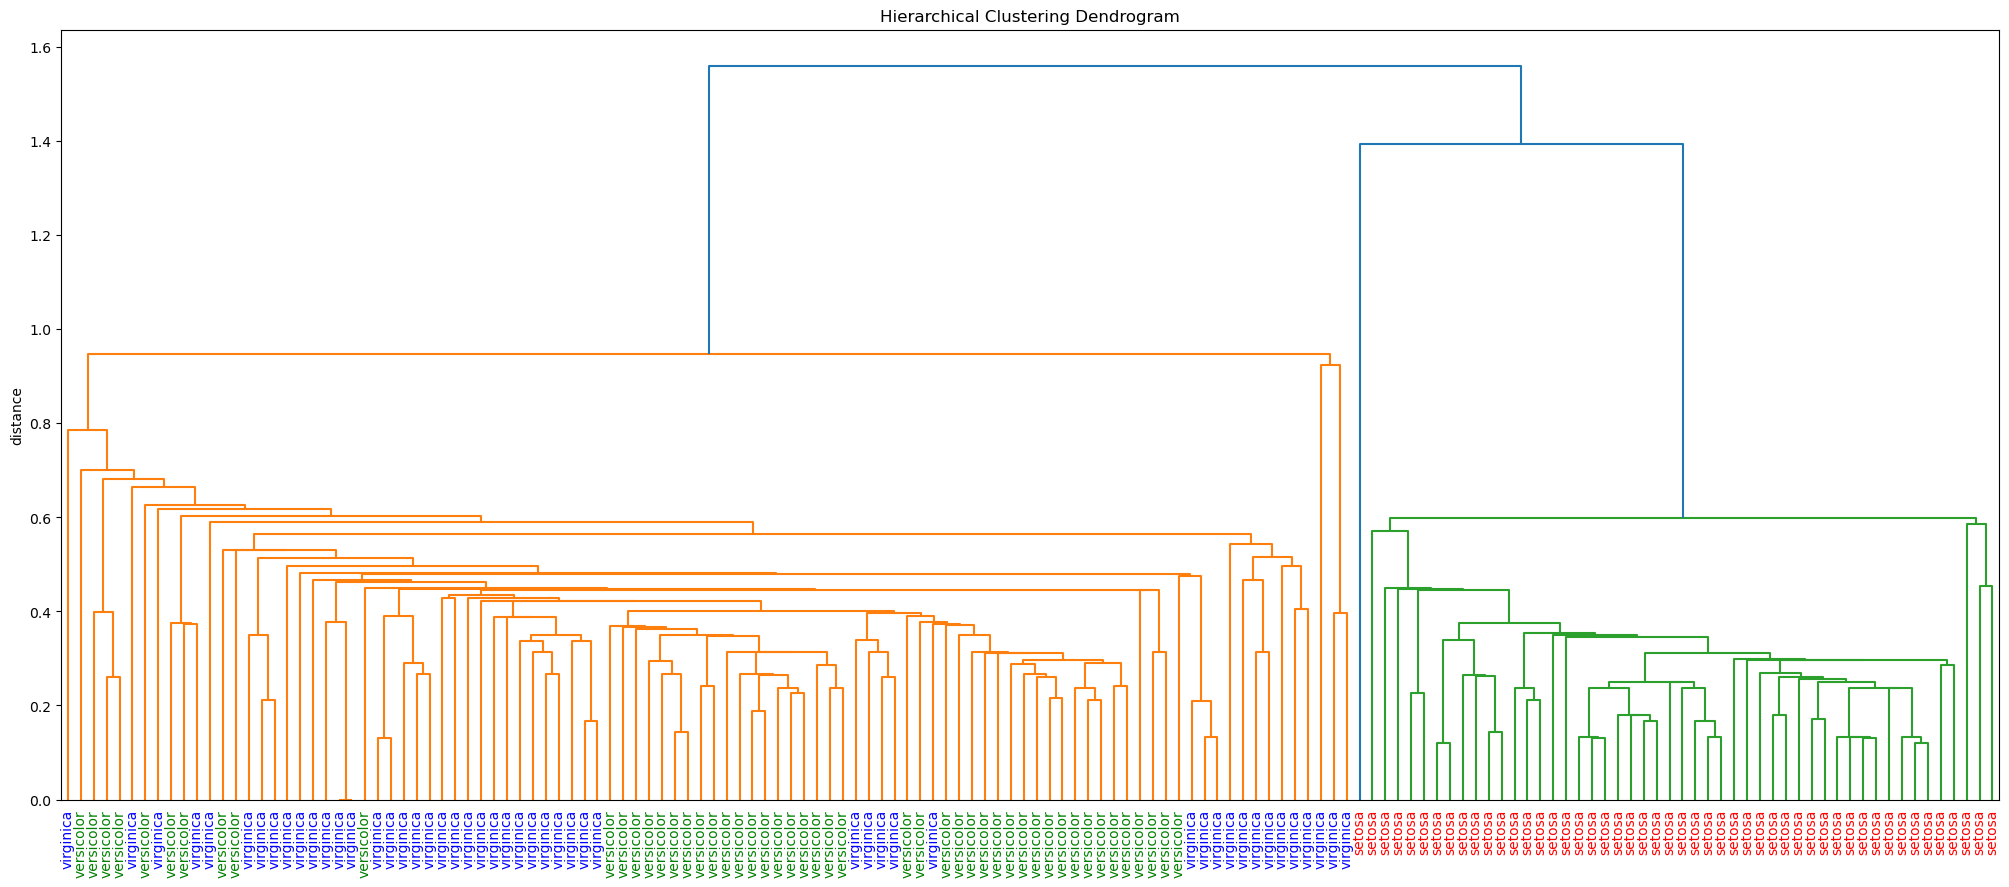

In [20]:
plt.figure(figsize=(25, 10))   # Creates a generic figure

dendrogram(                             # Creates the dendogram
            Z,
            labels=np.array(iris.iloc[:,4]),    #  select the labels
            leaf_rotation=90.,  # rotates the x-axis labels
            leaf_font_size=10,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc.


label_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

Agglomerative example with sklearn

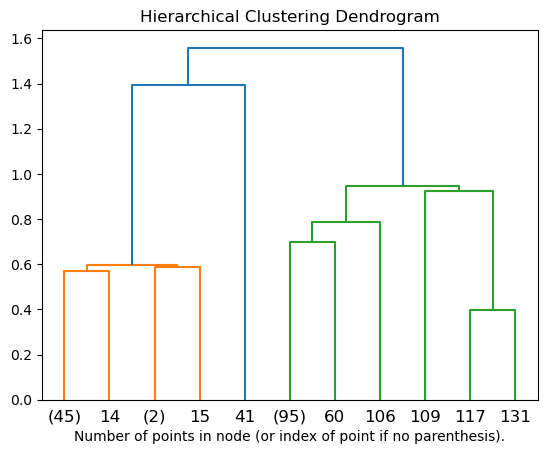

In [21]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for index, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[index] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single", affinity="euclidean")

model = model.fit(iris_scaled)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### K-Means clustering

In [23]:
from sklearn.cluster import KMeans

k=3 # nr of clusters
kmeans_iris = KMeans(n_clusters=k, max_iter=1000, n_init = 10)

## max_iter - number of iterations of the algorithm in each run
## n_init - number of runs from the algorithm; the solution is the one with best objective function value

kmeans_iris.fit(iris_scaled) # Fit the K-Means model to the scaled data and assigns each data point to one of the three clusters.
labels = kmeans_iris.labels_ # get cluster labels

centroids = kmeans_iris.cluster_centers_ # get cluster centroids
pd.crosstab(labels, iris["Species"], rownames=['clusters']) # creates a crosstabulation that shows how many data points from each species are assigned to each cluster.

Species,setosa,versicolor,virginica
clusters,,,
0,0,39,14
1,50,0,0
2,0,11,36


Plot the centroids (2D only)

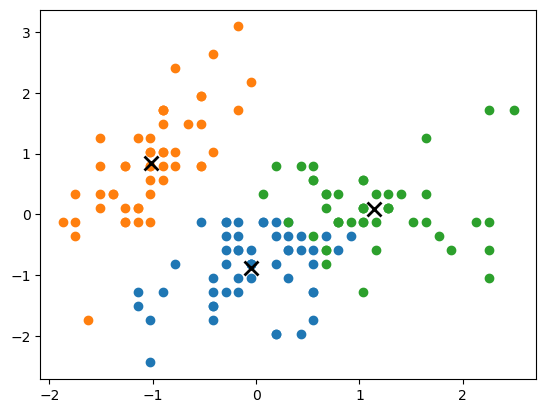

In [24]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = iris_scaled.values[np.where(labels==i)]
    # plot the data observations (only 2 first colums; change 0 and 1 to see others)
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size
    plt.setp(lines,mew=2.0)    # line width
    
plt.show()

Pairplot for correlation analysis

In [25]:
import warnings
warnings.filterwarnings(action='ignore', module='seaborn')

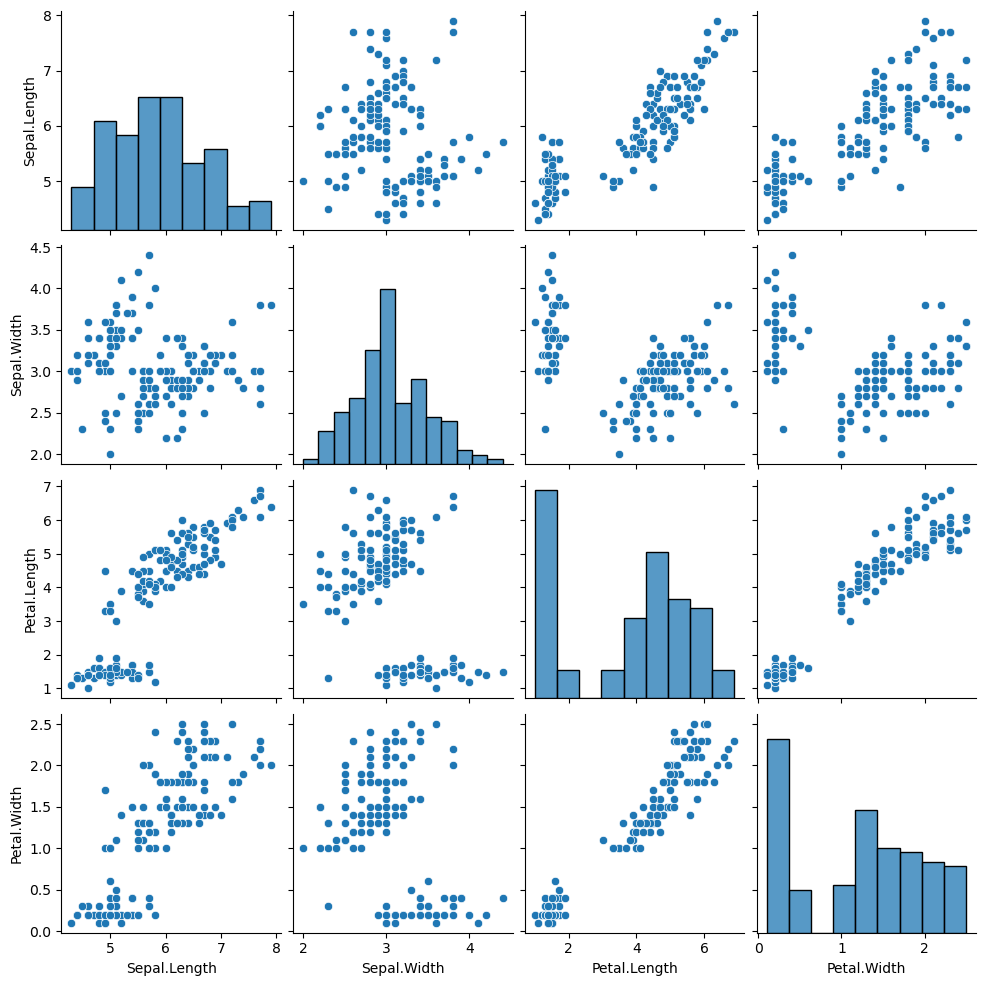

In [26]:
sns.pairplot(iris)

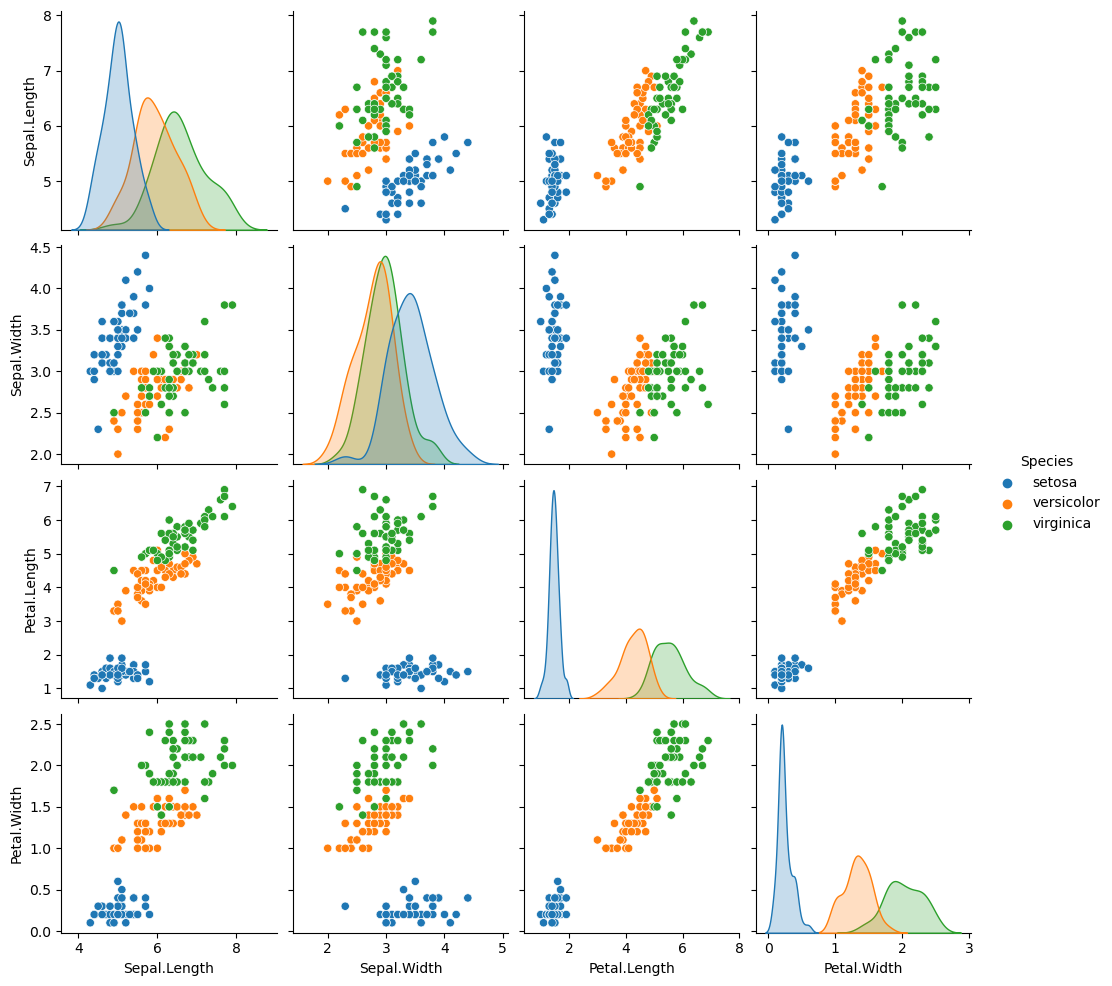

In [28]:
sns.pairplot(iris, hue = "Species")